# Examples of using pandas

## Loading datasets

First we load a Stata (https://en.wikipedia.org/wiki/Stata) proprietary data file.

In [1]:
import pandas as pd
data1 = pd.read_stata("dats.dta")
print data1.size
data1.head()

1428


,idpatient,entryear,sex,infection
0,1.0,1995.0,Male,HCV+ & HIV-
1,2.0,1995.0,Male,HCV+ & HIV-
2,3.0,1995.0,Male,HCV+ & HIV-
3,4.0,1995.0,Male,HCV+ & HIV-
4,5.0,1995.0,Male,HCV+ & HIV-


Let's find out the values in "infection".

In [2]:
data1["infection"].unique()

[HCV+ & HIV-, HCV+ & HIV+]
Categories (2, object): [HCV+ & HIV- < HCV+ & HIV+]

In [3]:
data1["entryear"].unique()

array([ 1995.,  1996.,  1997.,  1998.,  1999.,  2000.,  2001.,  2002.,
        2003.])

Now let's see the distribution of years and sex.

In [4]:
byyear = data1.groupby("entryear")
print byyear.count()

          idpatient  sex  infection
entryear                           
1995.0           53   53         53
1996.0           60   60         60
1997.0           63   63         63
1998.0           43   43         43
1999.0           48   48         48
2000.0           30   30         30
2001.0           19   19         19
2002.0           25   25         25
2003.0           16   16         16


In [5]:
some_part = data1[data1["entryear"]>2000]
print some_part.groupby("entryear").count()

          idpatient  sex  infection
entryear                           
2001.0           19   19         19
2002.0           25   25         25
2003.0           16   16         16


In [6]:
data1.groupby("sex").count()

,idpatient,entryear,infection
sex,,,
Male,290,290,290
Female,67,67,67


## Merging datasets

Now we have a second dataset with more data.

In [7]:
data2 = pd.read_csv("TxtDatafile.txt")
data2.head()

,idpatient entryear sex infection timeaddic
0,54\t1996\tFemale\tHCV+ & HIV-\t168
1,55\t1996\tFemale\tHCV+ & HIV-\t96
2,56\t1996\tFemale\tHCV+ & HIV-\t108
3,57\t1996\tFemale\tHCV+ & HIV-\t60
4,58\t1996\tFemale\tHCV+ & HIV-\t96


It seems the data was no CSV(Look at the \t characters)

In [8]:
data2 = pd.read_table("TxtDatafile.txt")
print data2.size
data2.head()

1550


,idpatient,entryear,sex,infection,timeaddic
0,54,1996,Female,HCV+ & HIV-,168
1,55,1996,Female,HCV+ & HIV-,96
2,56,1996,Female,HCV+ & HIV-,108
3,57,1996,Female,HCV+ & HIV-,60
4,58,1996,Female,HCV+ & HIV-,96


We see there is an additional field. What about the range of patient ids? The size of the datasets are the same, so they are not exactly the same sample. Let's first try to retain all the information.

In [9]:
data = data1.merge(data2, how="outer")
print data.size
data.head()

1815


,idpatient,entryear,sex,infection,timeaddic
0,1.0,1995.0,Male,HCV+ & HIV-,NaN
1,2.0,1995.0,Male,HCV+ & HIV-,NaN
2,3.0,1995.0,Male,HCV+ & HIV-,NaN
3,4.0,1995.0,Male,HCV+ & HIV-,NaN
4,5.0,1995.0,Male,HCV+ & HIV-,NaN


This means there was info on patients in each dataset with no match in the other. We can see that info:

In [10]:
missingtime = data[pd.isnull(data["timeaddic"])]
missingtime.size

265

We can then drop rows that contain any NA values, this is the default behaviour of dropna()

In [11]:
data = data.dropna()
print data.size
data.head()

1550


,idpatient,entryear,sex,infection,timeaddic
53,54.0,1996.0,Female,HCV+ & HIV-,168.0
54,55.0,1996.0,Female,HCV+ & HIV-,96.0
55,56.0,1996.0,Female,HCV+ & HIV-,108.0
56,57.0,1996.0,Female,HCV+ & HIV-,60.0
57,58.0,1996.0,Female,HCV+ & HIV-,96.0


## Visualizing via pandas

Pandas incorporates some methods to create plots using matplotlib behind the scenes. We can plot the whole dataframe, but in this case it will be nonsensical.

/Users/msicilia/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


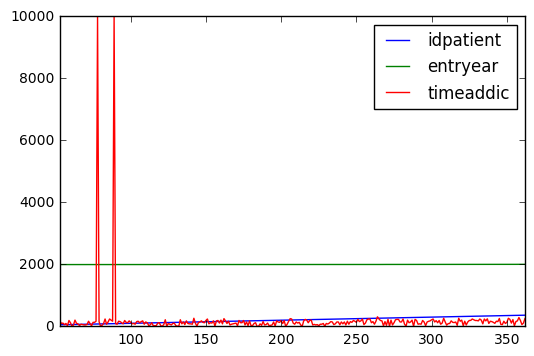

In [12]:
%matplotlib inline
data.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1122ae490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114cebe50>], dtype=object)

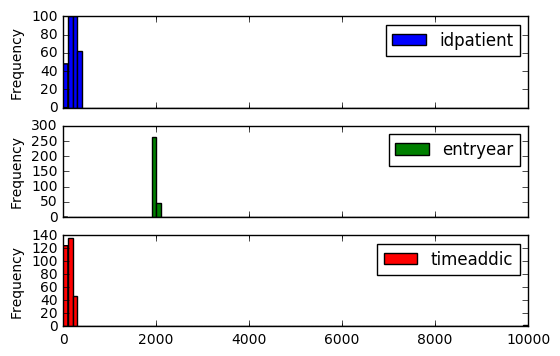

In [13]:
data.plot(subplots=True, kind="hist", bins=100)

As we see, unless the data is in similar ranges it makes sense to plot it individually.

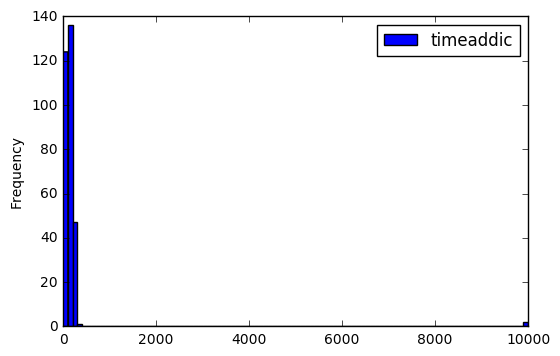

In [14]:
data.plot(y="timeaddic", kind="hist", bins=100)

We see a single data point that clearly appeas as an outlier.

In [15]:
# The maximum value:
print data["timeaddic"].max()
# And the position of that value:
print data["timeaddic"].argmax()
data.ix[78]

9999.0
78


idpatient             79
entryear            1996
sex                 Male
infection    HCV+ & HIV-
timeaddic           9999
Name: 78, dtype: object

Then we can exclude that value from the visualization.

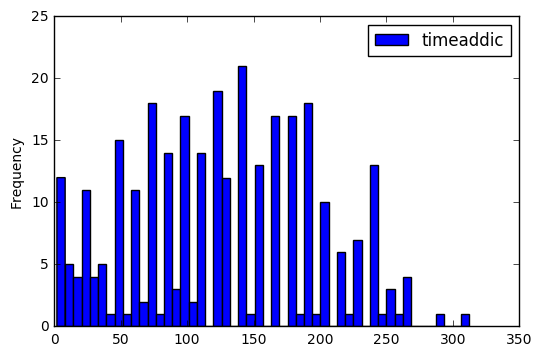

In [16]:
dataclean = data[data["timeaddic"]<9999]
dataclean.plot(y="timeaddic", kind="hist", bins=50)

## Using subsets 

The grouping in pandas allows for studying different sub-samples easily.

/Users/msicilia/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/tools/plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


OrderedDict([('HCV+ & HIV+',
              {'boxes': [<matplotlib.lines.Line2D at 0x116ad1c10>],
               'caps': [<matplotlib.lines.Line2D at 0x116adf9d0>,
               'fliers': [<matplotlib.lines.Line2D at 0x116ad1490>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x116ad1610>],
               'whiskers': [<matplotlib.lines.Line2D at 0x116ad1d10>,
                <matplotlib.lines.Line2D at 0x116adf390>]}),
             ('HCV+ & HIV-',
              {'boxes': [<matplotlib.lines.Line2D at 0x116a7c590>],
               'caps': [<matplotlib.lines.Line2D at 0x116a53e90>,
               'fliers': [<matplotlib.lines.Line2D at 0x116853d10>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x116968c50>],
               'whiskers': [<matplotlib.lines.Line2D at 0x116a7c250>,
                <matplotlib.lines.Line2D at 0x116a68290>]})])

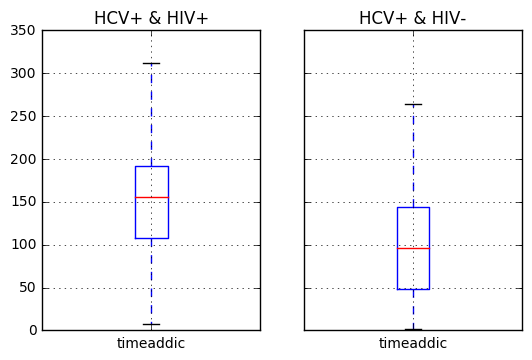

In [17]:
bydisease = dataclean.groupby("infection")
bydisease.boxplot(column="timeaddic")

Let's check if the mean of both subpopulations is the same.

In [18]:
from scipy.stats import ttest_ind
g1, g2 = bydisease.groups.values()
ts, p = ttest_ind(g1, g2)
print p
print 'Difference!' if p < 0.05 else 'No difference'

0.00200590028439
Difference!


From the doc of ttest_ind: If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

We can also use categorical variables to create multiplots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10392ff50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c189650>]], dtype=object)

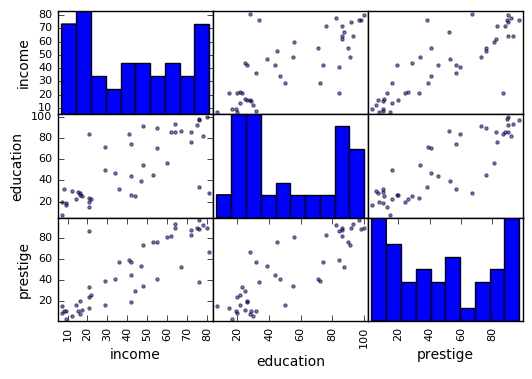

In [19]:
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm

duncan_prestige = sm.datasets.get_rdataset("Duncan", "car").data

# print duncan_prestige.__doc__

scatter_matrix(duncan_prestige)

## A glimpse to statmodels

In statistical libraries and machine learning, data can be specified via formulas or via selection of columns.

More info at: http://statsmodels.sourceforge.net/documentation.html

In [20]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
# Get a dataset from R collection:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
# Select some fields:
df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


In [21]:
mod = smf.ols(formula='Lottery ~ Literacy + Wealth', data=df)
res = mod.fit()
print res.params
print res.rsquared

Intercept    39.797879
Literacy     -0.378007
Wealth        0.413826
dtype: float64
0.308778740779


In [22]:
y = df['Lottery']
X = df[['Literacy', 'Wealth']]
mod2 = sm.OLS(y,X)
res = mod2.fit()
print res.params
print res.rsquared

Literacy    0.181394
Wealth      0.749521
dtype: float64
0.776785535712
